# Introduction
For our project, we chose the cleanest neighborhood in Pittsburgh. We devised this metric after brainstorming many ideas that often didn't have enough datasets to support them. For example, we at first wanted to do the most technologically advanced, but the best and only dataset we could was on as, smart trashcans. Another alternative metric was things to do, but we could not find very good data for this metric. We landed on cleanliness after looking at smart trashcans and gaining inspiration. We looked at what data WPRDC had on clean environment, and came up with smart trashcans, air quality, and green spaces.

# The Metric
The metric is the closest neighborhood in Pittsburgh, and we are measuring the air quality index, the amount of green spaces available, and the amount of smart trash cans in use. The three data sets we are using from WPRDC are Operational Green Spaces, Smart Trash Containers, and Allegheny County Air Quality.

# Submetric Data

           neighborhood  number of cans
0             Shadyside              76
1               Liberty              68
2   Squirrel Hill South              63
3            Bloomfield              58
4           North Shore              53
..                  ...             ...
74           Mt. Oliver               1
75        East Carnegie               1
76              Windgap               1
77          South Shore               1
78       Swisshelm Park               1

[79 rows x 2 columns]


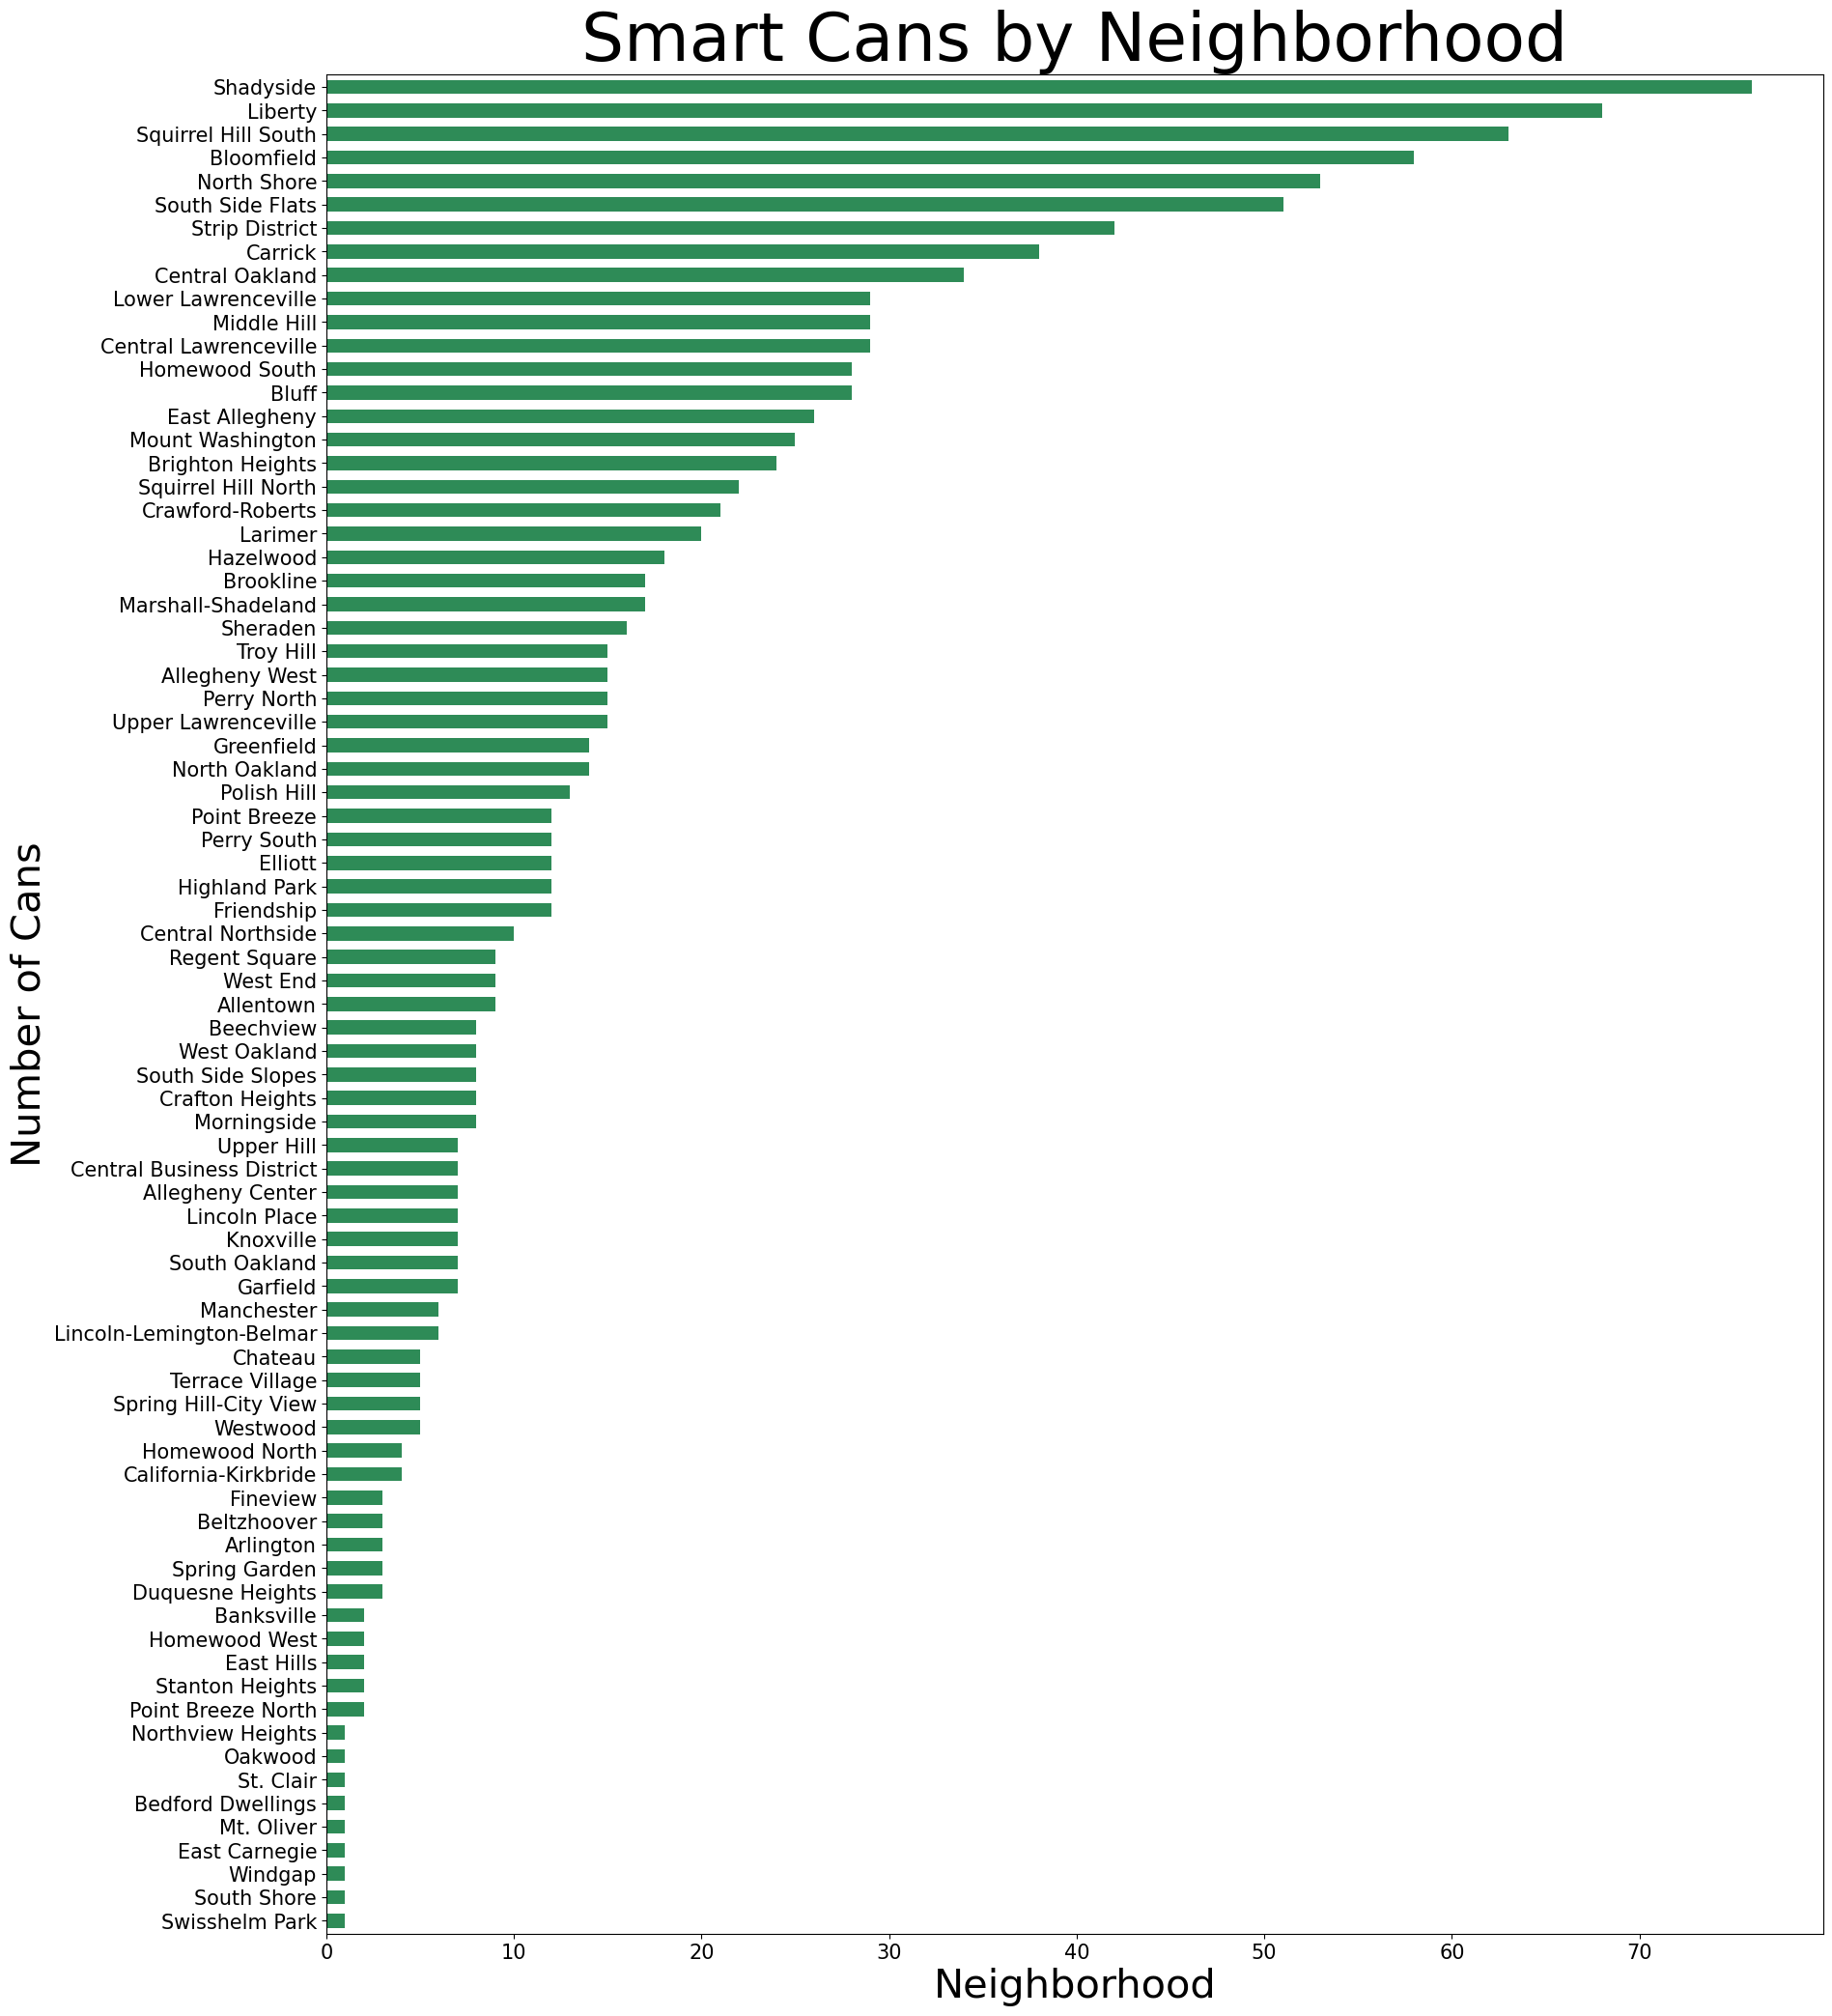

                 neighborhood  number of spaces
0                     Liberty                 6
1                Point Breeze                 5
2   Central Business District                 4
3             Central Oakland                 3
4               South Oakland                 2
5          Point Breeze North                 2
6         Squirrel Hill South                 2
7              Swisshelm Park                 2
8            Crawford Roberts                 1
9                   Beechview                 1
10                  Brookline                 1
11              North Oakland                 1
12                Polish Hill                 1
13              Regent Square                 1
14                   Sheraden                 1


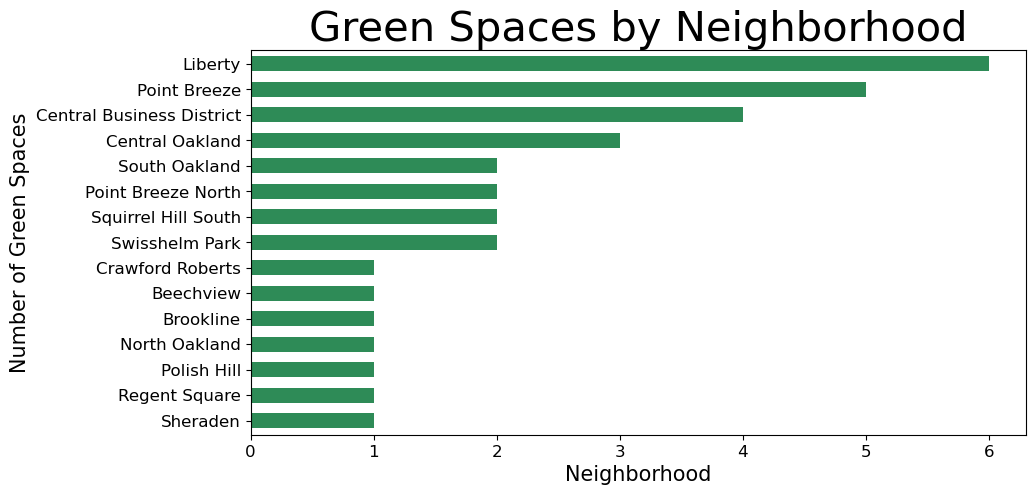

             neighborhood  index_value
0            West Mifflin     6.335548
1              Flag Plaza     9.949275
2   Glassport High Street    17.377488
3                 Liberty    17.952131
4          North Braddock    18.777778
5            Parkway East    21.637213
6           South Fayette    23.850718
7                  Avalon    24.239649
8       Harrison Township    24.315764
9              Pittsburgh    25.052115
10               Clairton    27.919782
11                Lincoln    35.108002
12          Lawrenceville    37.625053


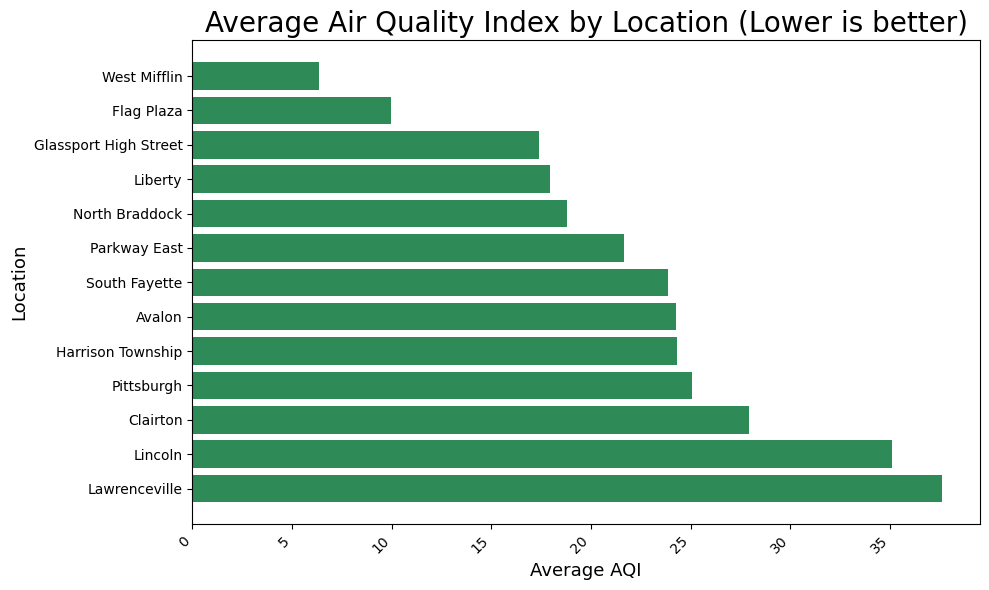

In [39]:
%run SmartTrashData.ipynb
%run GreenSpacesData.ipynb
%run AirQaulityIndexData.ipynb

In [40]:
merged = pd.merge(locations.reset_index(), spaces.reset_index(), on='neighborhood', how='outer', suffixes=('_cans', '_spaces'))

final_merged = pd.merge(merged, ave_aqi_final.reset_index(), on='neighborhood', how='outer', suffixes=('', '_aqi'))

final_merged['average_index'] = final_merged[['index_cans', 'index_spaces','index']].mean(axis=1)


final = final_merged.sort_values(by='average_index', ascending = False)

final.head(-1)

,index_cans,neighborhood,number of cans,index_spaces,number of spaces,index,index_value,average_index
72,77.0,South Shore,1.0,NaN,NaN,NaN,NaN,77.000000
91,76.0,Windgap,1.0,NaN,NaN,NaN,NaN,76.000000
26,75.0,East Carnegie,1.0,NaN,NaN,NaN,NaN,75.000000
54,74.0,Mt. Oliver,1.0,NaN,NaN,NaN,NaN,74.000000
6,73.0,Bedford Dwellings,1.0,NaN,NaN,NaN,NaN,73.000000
...,...,...,...,...,...,...,...,...
9,3.0,Bloomfield,58.0,NaN,NaN,NaN,NaN,3.000000
33,NaN,Glassport High Street,NaN,NaN,NaN,2.0,17.377488,2.000000
44,1.0,Liberty,68.0,0.0,6.0,3.0,17.952131,1.333333
30,NaN,Flag Plaza,NaN,NaN,NaN,1.0,9.949275,1.000000


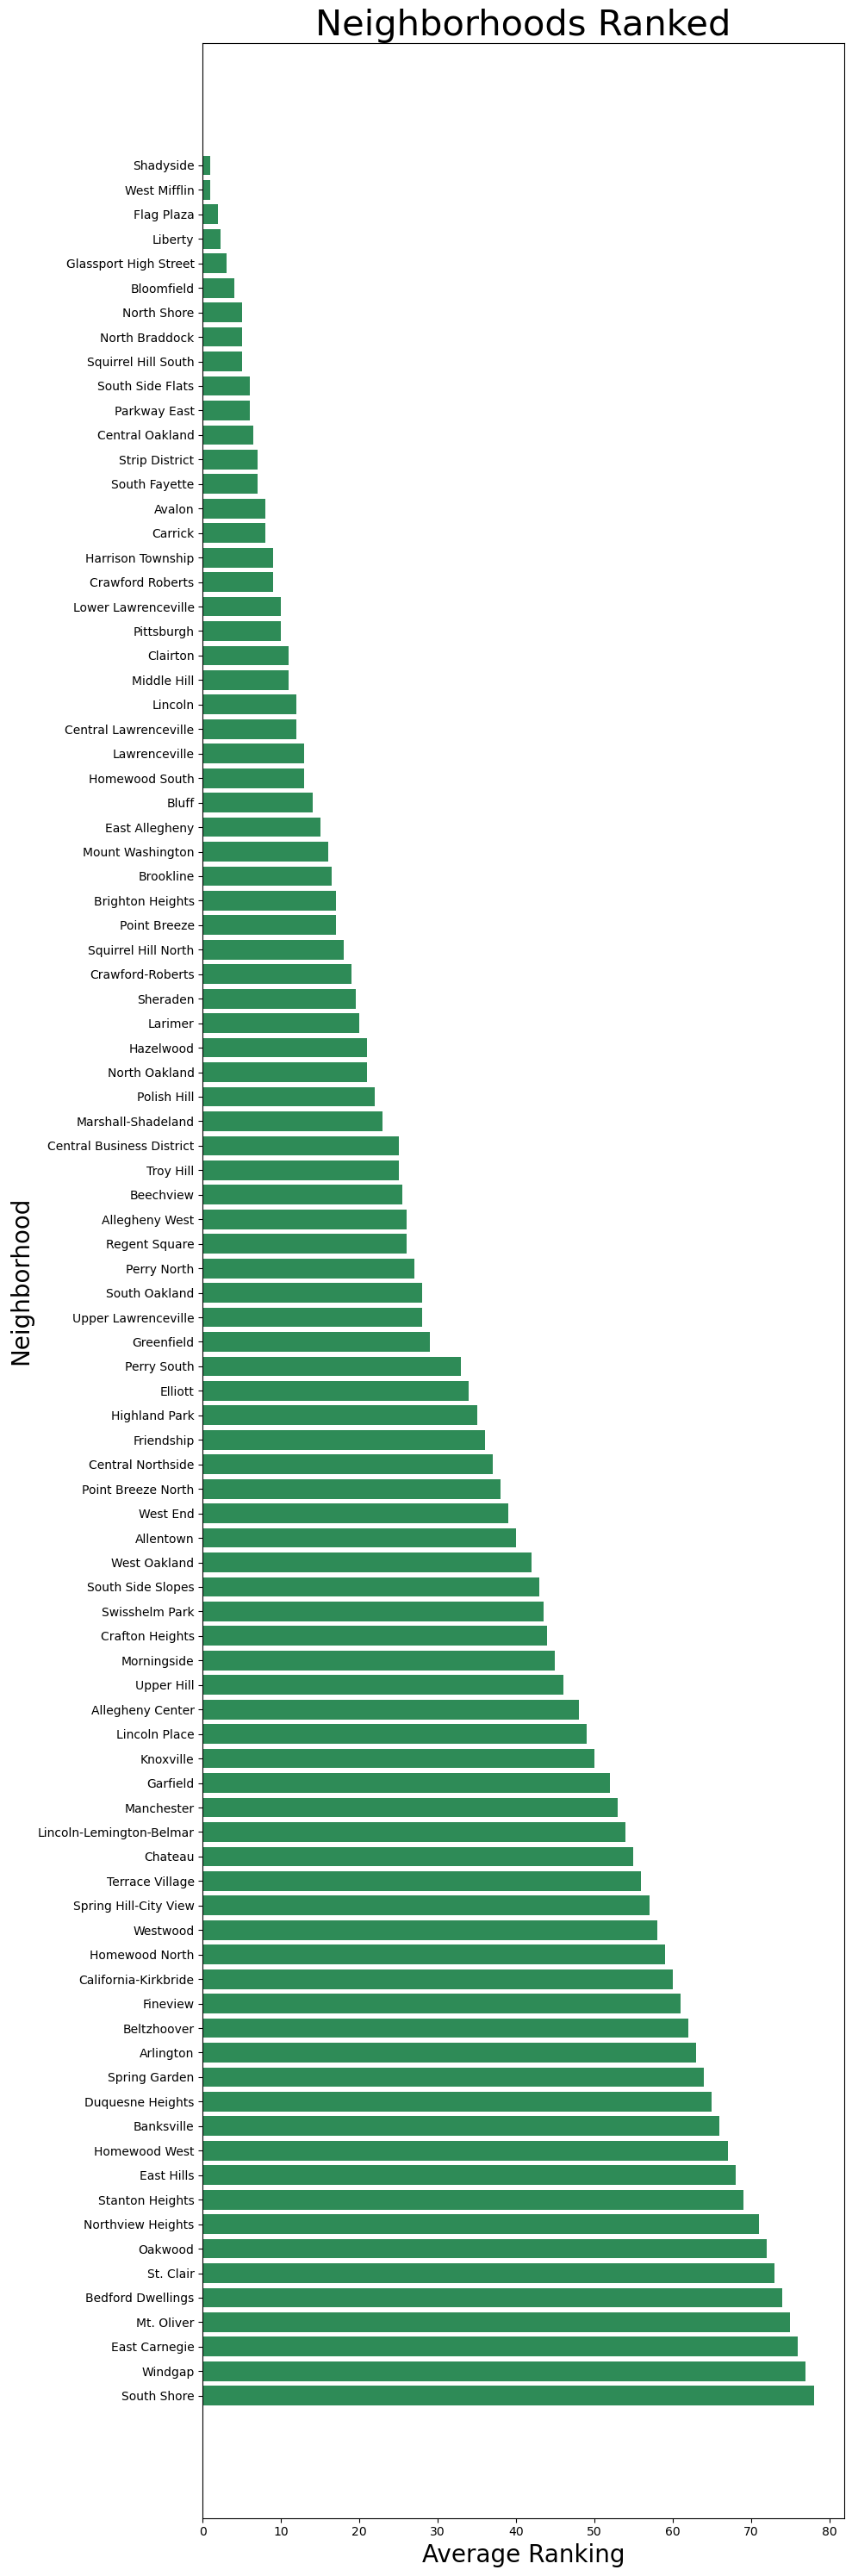

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 30))
plt.barh(final['neighborhood'], final['average_index'] + 1, color='seagreen')
plt.xlabel('Average Ranking', fontsize=20)
plt.ylabel('Neighborhood', fontsize=20)    
plt.title('Neighborhoods Ranked', fontsize=30)
plt.tick_params(axis='x',labelsize = 10)
plt.tick_params(axis='y',labelsize = 10)
plt.tight_layout()  
plt.show()

# Data Analysis
Based off the average rankings above, we can say the "best" neighborhoods are Shadyside, West Mifflin, Flag Plaza, and Liberty. However, Shadyside, West Mifflin, and Flag Plaza do not have data in all of the submetrics. This mean the ranking is not an accurate representation of the standings overall. The best neighboood with data in all submetrics is Liberty. Therefore, we conclude that Liberty is the cleanest neighborhood in Pittsburgh, thus making the "best".

# Conclusion
Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.
## Aidan
I thought Shadyside would have been the best neighborhood, considering how it is always very nice when I visit there. While it was technically on top, it didn't have data in all of the submetrics, meaning that it wasn't truly the cleanest. However, I wasn't too suprised to see Liberty was on top.

## Utsav
I thought that Oakland was the best because I thought that the University of Pittsburgh would've been more green oriented. In our data, Oakland is still ranked pretty highly, but it is not as high as Liberty. I too was not surpirsed to dee Liberty on top, just by looking at where it ranked in each of our submetrics.